<h1 style="color: #ffffff; background-color: #013220; padding: 16px 24px; text-align: center; border-radius: 12px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2); letter-spacing: 1px;">
  🌱 Seeds Dataset
</h1>

<img src="seeds image.jpg" width="1200" height="500">

<h2 style="
    color: #FFFFFF; 
    background-color: #013220; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 28px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  INTRODUCTION
</h2>

This project explores clustering techniques to categorize seeds based on their morphological features. Using algorithms such as Mean Shift, KMeans, Agglomerative Clustering, and DBSCAN, the goal is to identify natural groupings within the seeds dataset without relying on predefined labels. Cluster quality is assessed using the Silhouette Score, which helps determine how well the seeds are grouped. The project demonstrates how different clustering methods perform in distinguishing seed types, providing insights useful for agricultural classification and research.

<h2 style="
    color: #FFFFFF; 
    background-color: #013220; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 28px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  About the Dataset
</h2>

The Seeds dataset is a well-known dataset in pattern recognition and machine learning, commonly used for clustering and classification tasks. It consists of 210 samples of wheat seeds, each described by seven numerical features derived from images of seed kernels. These features represent various geometrical properties such as area, perimeter, compactness, and kernel dimensions. Although the original dataset includes class labels for three wheat varieties (Kama, Rosa, and Canadian), in this project we use the dataset for unsupervised learning (clustering), and the class labels are ignored.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.cluster import MeanShift, estimate_bandwidth

from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [19]:
data = pd.read_csv("seeds.txt", delim_whitespace=True, header=None)
data.head()
data.columns = [
    "Area",
    "Perimeter",
    "Compactness",
    "Kernel_Length",
    "Kernel_Width",
    "Asymmetry_Coefficient",
    "Kernel_Groove_Length",
    "Seed_Class"
]

data.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coefficient,Kernel_Groove_Length,Seed_Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


<h2 style="
    color: #FFFFFF; 
    background-color: #013220; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 28px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  Column Description
</h2>

<table style="width:100%; border-collapse: collapse; font-family: 'Georgia', serif;">
  <thead>
    <tr style="background-color: #013220; color: #FFFFFF;">
      <th style="padding: 10px; border: 1px solid #ABB2B9;">Column</th>
      <th style="padding: 10px; border: 1px solid #ABB2B9;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 10px; border: 1px solid #ABB2B9;">Area (A)</td>
      <td style="padding: 10px; border: 1px solid #ABB2B9;">The area of the seed (number of pixels within the boundary).</td>
    </tr>
    <tr style="background-color: #F8F9F9;">
      <td style="padding: 10px; border: 1px solid #ABB2B9;">Perimeter (P)</td>
      <td style="padding: 10px; border: 1px solid #ABB2B9;">The length of the outer boundary of the seed in pixels.</td>
    </tr>
    <tr>
      <td style="padding: 10px; border: 1px solid #ABB2B9;">Compactness (C)</td>
      <td style="padding: 10px; border: 1px solid #ABB2B9;">Calculated as (P² / 4πA). Indicates how circular the seed is.</td>
    </tr>
    <tr style="background-color: #F8F9F9;">
      <td style="padding: 10px; border: 1px solid #ABB2B9;">Length of Kernel (L)</td>
      <td style="padding: 10px; border: 1px solid #ABB2B9;">The major axis length of the fitted ellipse. Approximates the seed's length.</td>
    </tr>
    <tr>
      <td style="padding: 10px; border: 1px solid #ABB2B9;">Width of Kernel (W)</td>
      <td style="padding: 10px; border: 1px solid #ABB2B9;">The minor axis length of the fitted ellipse. Approximates the seed's width.</td>
    </tr>
    <tr style="background-color: #F8F9F9;">
      <td style="padding: 10px; border: 1px solid #ABB2B9;">Asymmetry Coefficient (AC)</td>
      <td style="padding: 10px; border: 1px solid #ABB2B9;">Measures asymmetry of the seed's shape based on contour deviation.</td>
    </tr>
    <tr>
      <td style="padding: 10px; border: 1px solid #ABB2B9;">Length of Kernel Groove (LG)</td>
      <td style="padding: 10px; border: 1px solid #ABB2B9;">The length of the groove on the seed surface. Important for seed classification.</td>
    </tr>
    <tr style="background-color: #F8F9F9;">
      <td style="padding: 10px; border: 1px solid #ABB2B9;">Class</td>
      <td style="padding: 10px; border: 1px solid #ABB2B9;">Wheat Variety (Kama, Rosa, or Canadian).</td>
    </tr>
  </tbody>
</table>

<h2 style="
    color: #FFFFFF; 
    background-color: #013220; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 28px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  Data Exploration and Summary
</h2>

In [22]:
data.size

1680

In [23]:
data.shape

(210, 8)

In [24]:
data.isnull().sum()

Area                     0
Perimeter                0
Compactness              0
Kernel_Length            0
Kernel_Width             0
Asymmetry_Coefficient    0
Kernel_Groove_Length     0
Seed_Class               0
dtype: int64

In [25]:
data.duplicated().sum()

0

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   210 non-null    float64
 1   Perimeter              210 non-null    float64
 2   Compactness            210 non-null    float64
 3   Kernel_Length          210 non-null    float64
 4   Kernel_Width           210 non-null    float64
 5   Asymmetry_Coefficient  210 non-null    float64
 6   Kernel_Groove_Length   210 non-null    float64
 7   Seed_Class             210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
Perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
Compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
Kernel_Length,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
Kernel_Width,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
Asymmetry_Coefficient,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
Kernel_Groove_Length,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
Seed_Class,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000


## Insight :
    •	Area, Perimeter, Kernel Length, and Kernel Width vary significantly, showing potential for class differentiation.
	•	Compactness has a smaller range and more centralized distribution across all samples.
	•	Asymmetry Coefficient has a wide spread, suggesting high variance among seeds.
	•	Groove Length is a strong feature with distinct ranges per class.

<h2 style="
    color: #FFFFFF; 
    background-color: #013220; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 28px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  EDA (Exploratory Data Analysis)
</h2>

<h2 style="
    color: #154734; 
    background-color: #DFF5E1; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 28px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  Univariate Analysis
</h2>

# Distribution plots of each Feature

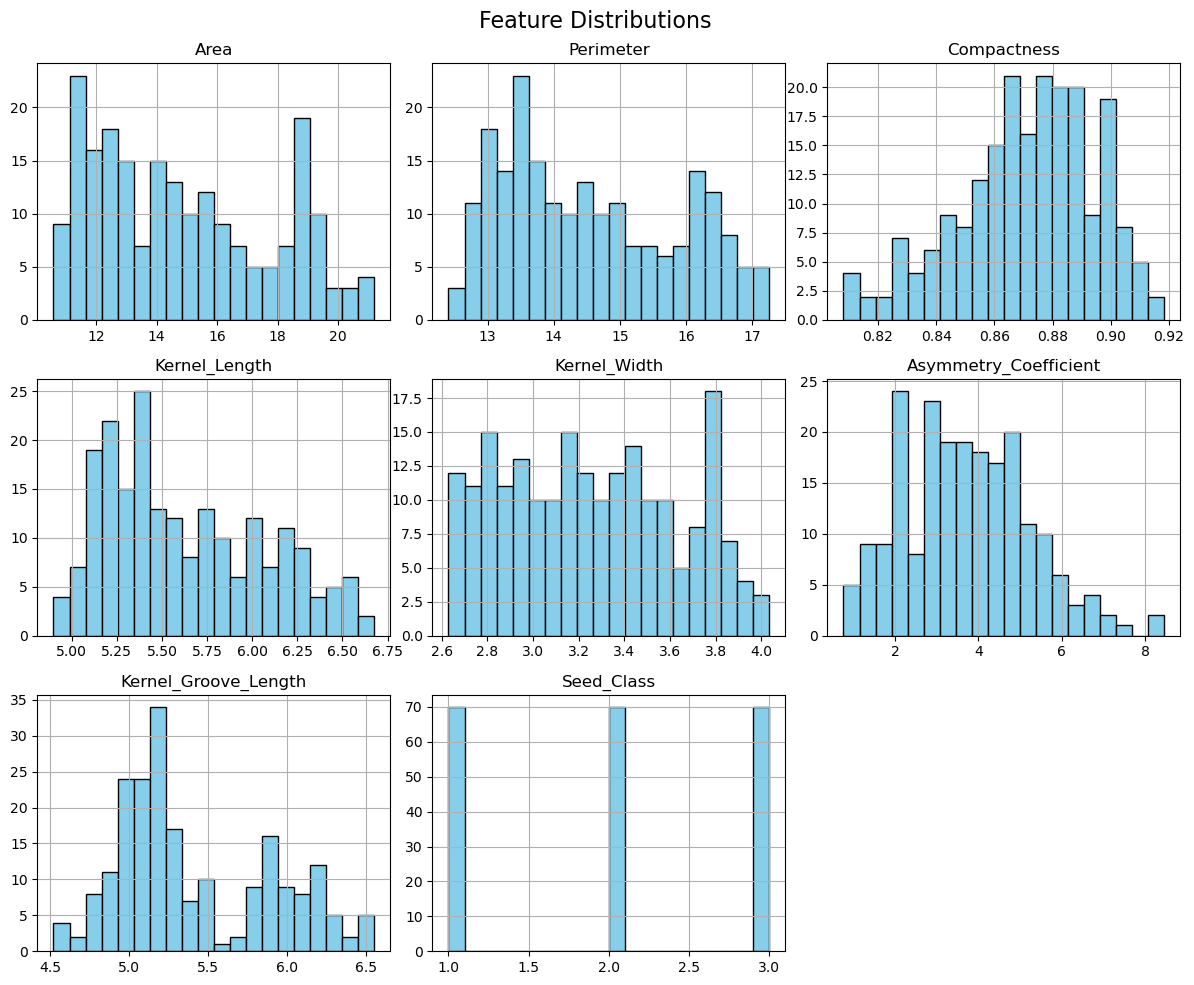

In [32]:
data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

## Insight :
    •	Most features are approximately normally distributed or slightly skewed.
	•	Asymmetry Coefficient is the most skewed feature.
	•	Compactness and Groove Length show less variability.

<h2 style="
    color: #154734; 
    background-color: #DFF5E1; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 28px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  Bivariate Analysis
</h2>

# Boxplot comparison of Features across Wheat Classes :

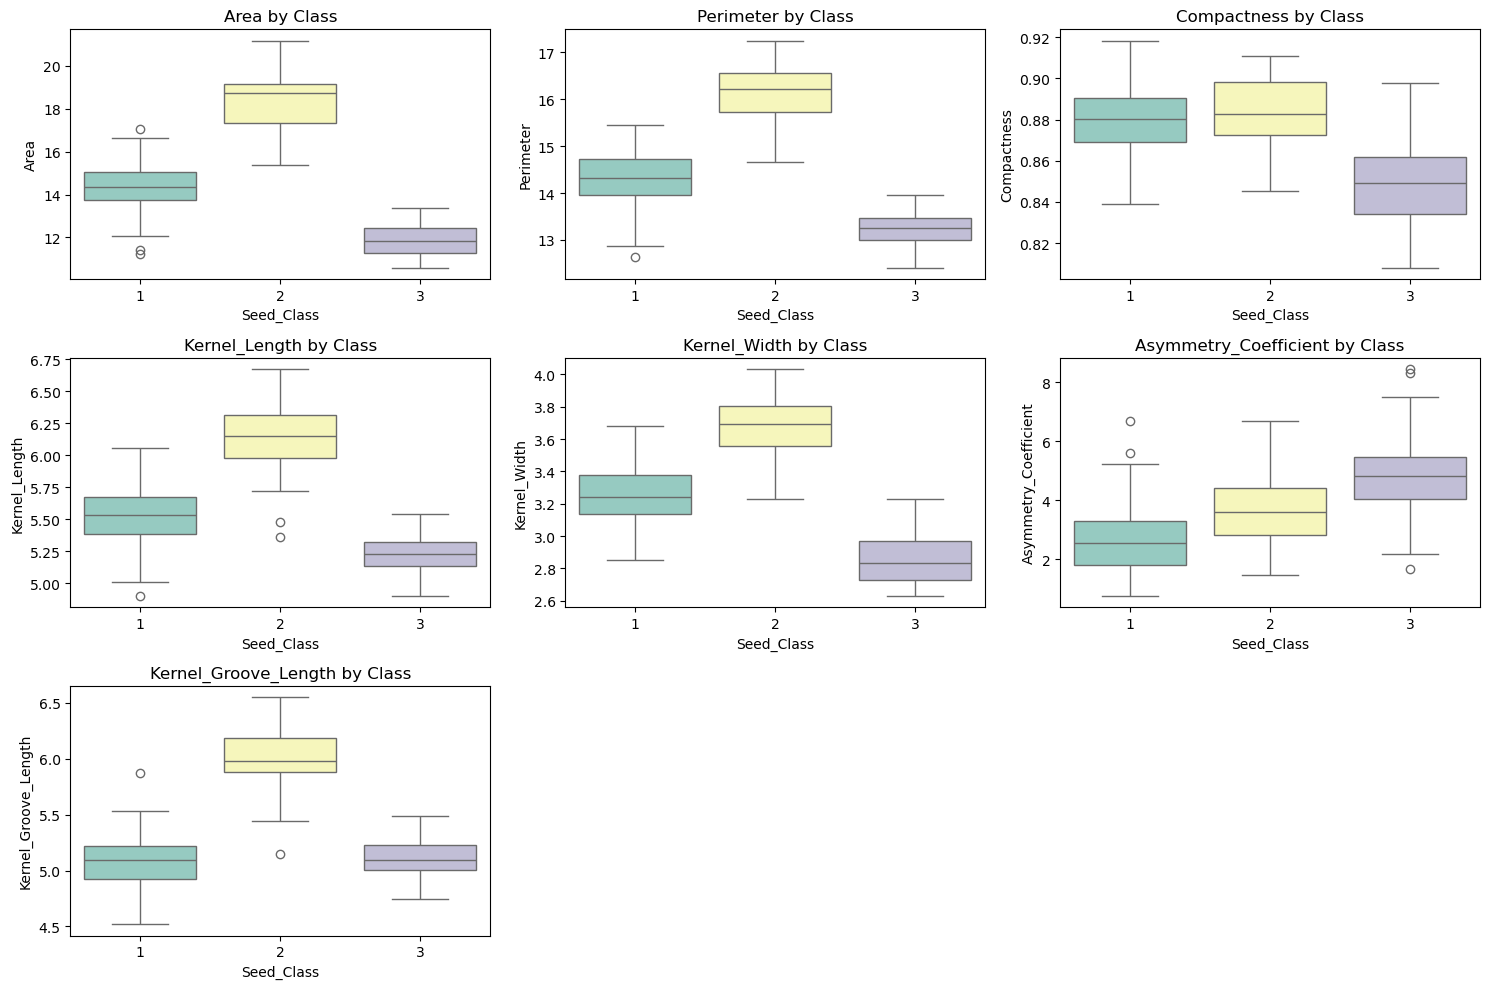

In [36]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Seed_Class', y=column, data=data, palette='Set3')
    plt.title(f"{column} by Class")
plt.tight_layout()
plt.show()

## Insight :
	•	Area, Kernel Length, Perimeter, Groove Length show significant differences between classes.
	•	Compactness is very similar across classes — less useful for class separation.
	•	Asymmetry Coefficient shows more overlap and is noisy.

<h2 style="
    color: #154734; 
    background-color: #DFF5E1; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 28px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  Multivariate Analysis
</h2>

# Pairplot Analysis for class :

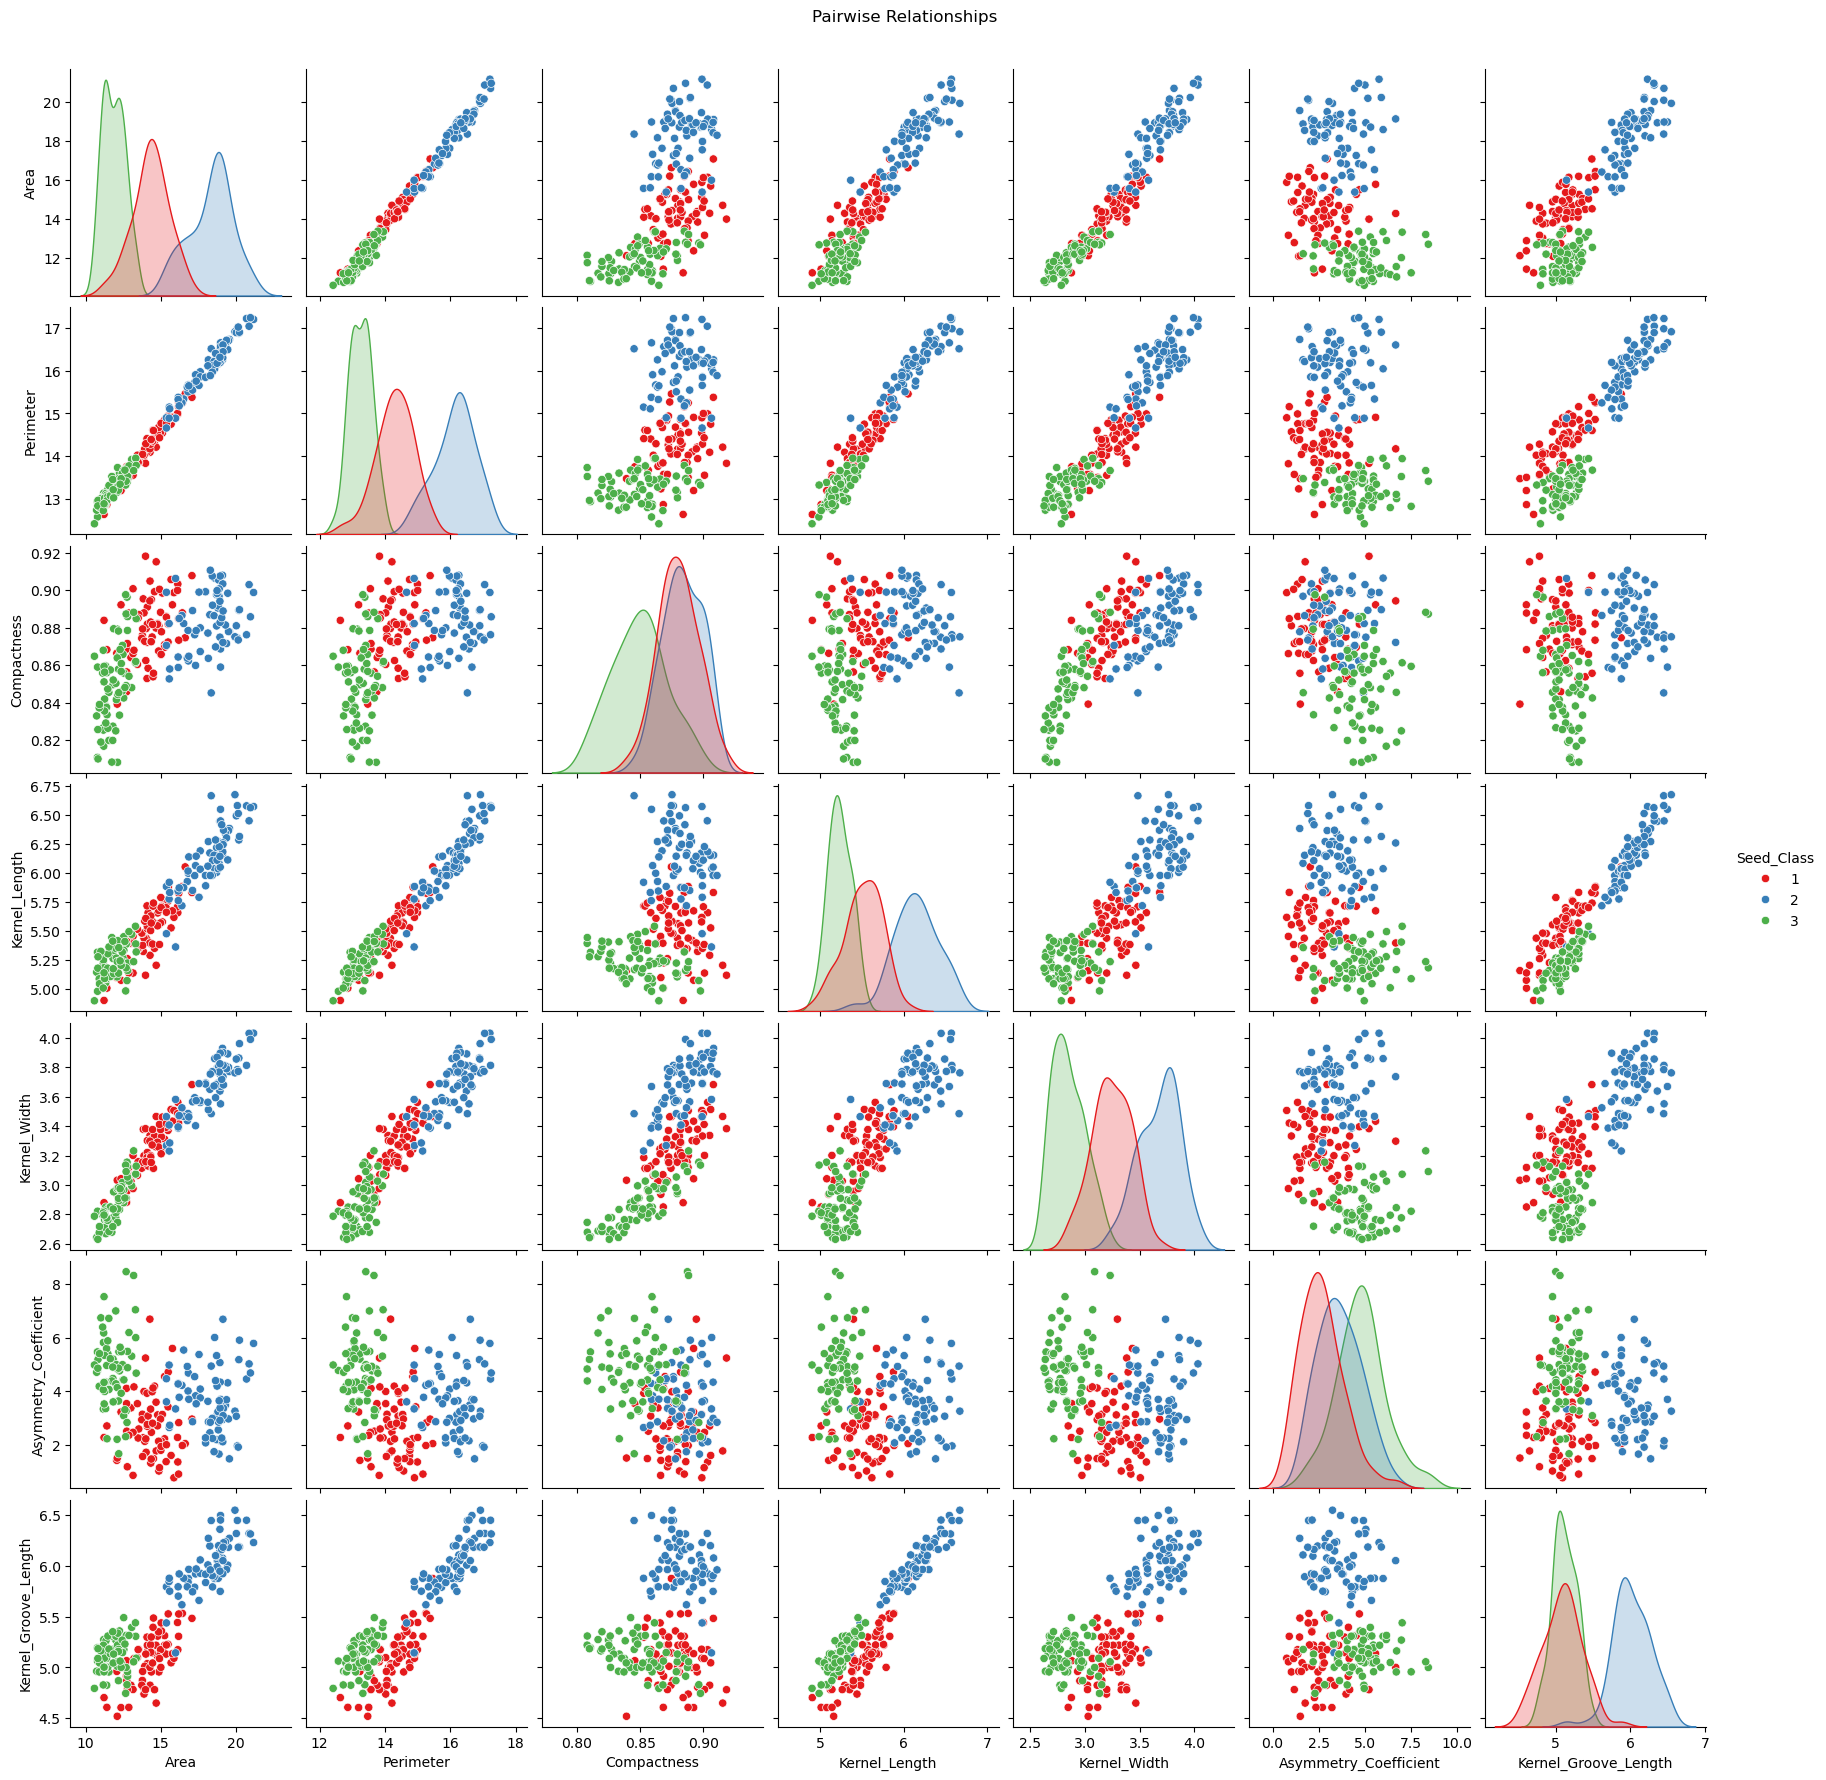

In [40]:
sns.pairplot(data, hue='Seed_Class', palette='Set1', diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

## Insight :
    •	Groove Length vs Kernel Width shows clear class clusters.
    •	Area, Kernel Length, Perimeter are highly correlated and help in class separation.
    •	Compactness overlaps slightly across all classes.

# Heatmap of Feature correlations :

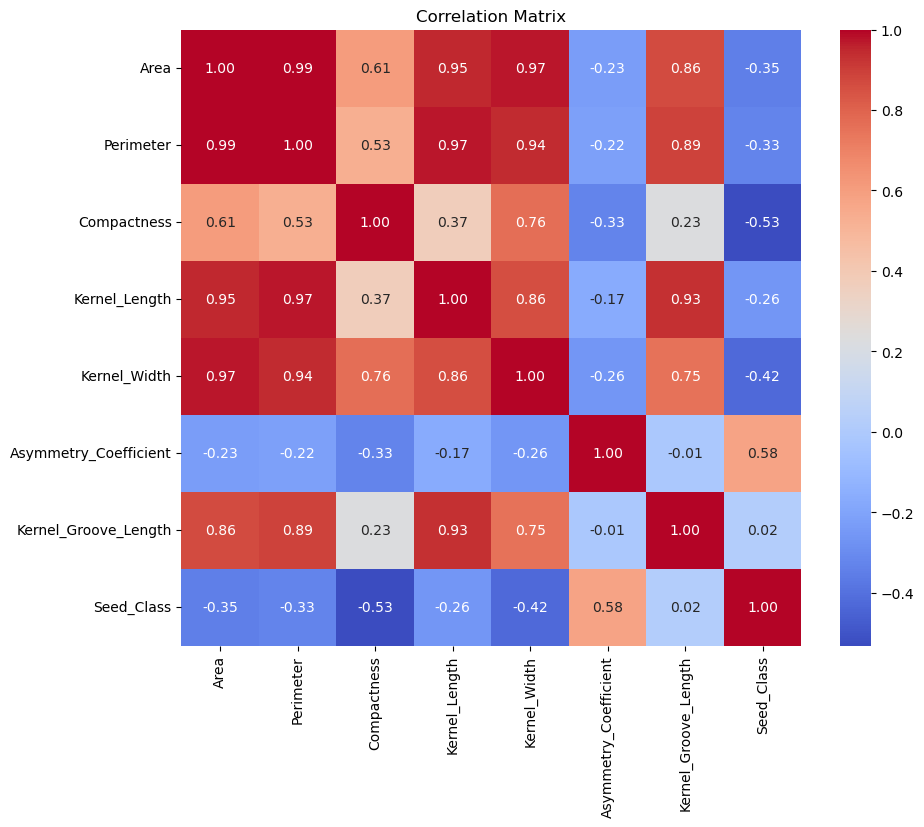

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## Insight :
    •	Area, Perimeter, and Kernel Length are strongly positively correlated (>0.9).
	•	Compactness is negatively correlated with other size-based features.
	•	Asymmetry Coefficient and Kernel Groove Length show low correlation with most features — making them useful for 
            distinguishing classes.

### Dropping the target :

In [46]:
df = data.drop("Seed_Class", axis=1)

In [47]:
df

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coefficient,Kernel_Groove_Length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


<h2 style="
    color: #FFFFFF; 
    background-color: #013220; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 28px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  Standardization of Data
</h2>

In [49]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [50]:
df_scaled

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

<h2 style="
    color: #FFFFFF; 
    background-color: #013220; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 30px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  Principal Component Analysis (PCA)
</h2>

### Principal Component Analysis (PCA) was performed on the standardized dataset to reduce dimensionality and improve visualization while retaining the most important variance in the data.

In [53]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

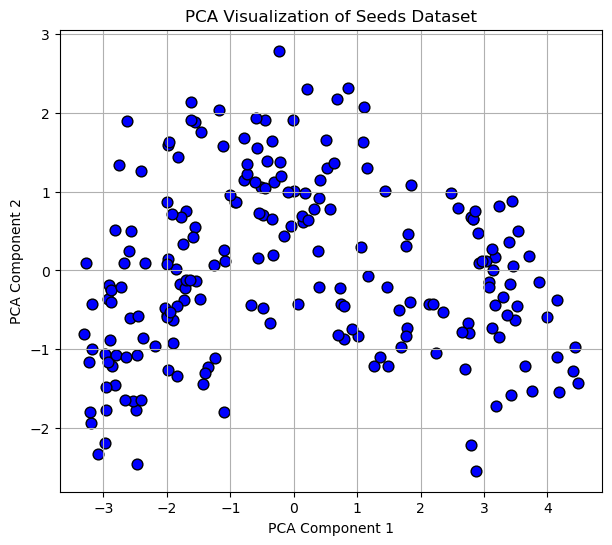

In [54]:
plt.figure(figsize=(7, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c="blue", edgecolor='k', s=60)
plt.title("PCA Visualization of Seeds Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

<h2 style="
    color: #FFFFFF; 
    background-color: #013220; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 30px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  KMeans Clustering
</h2>

## Elbow method :

### The Elbow Method was employed to determine the optimal number of clusters (k) by plotting the within-cluster sum of squares (WCSS) against different k values and identifying the point where adding more clusters yields diminishing returns.

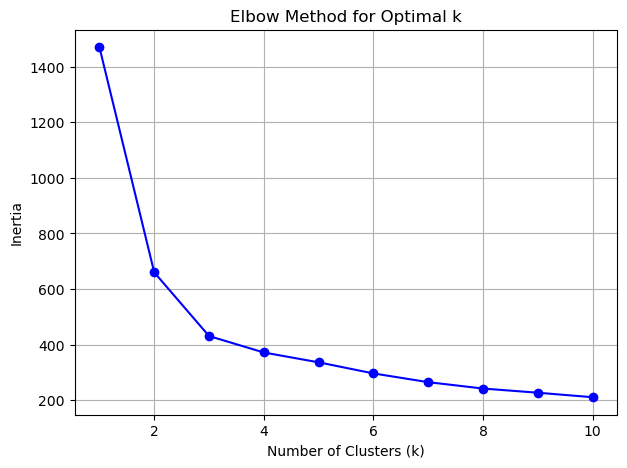

In [58]:
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow
plt.figure(figsize=(7, 5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

KMeans Silhouette Score: 0.4928


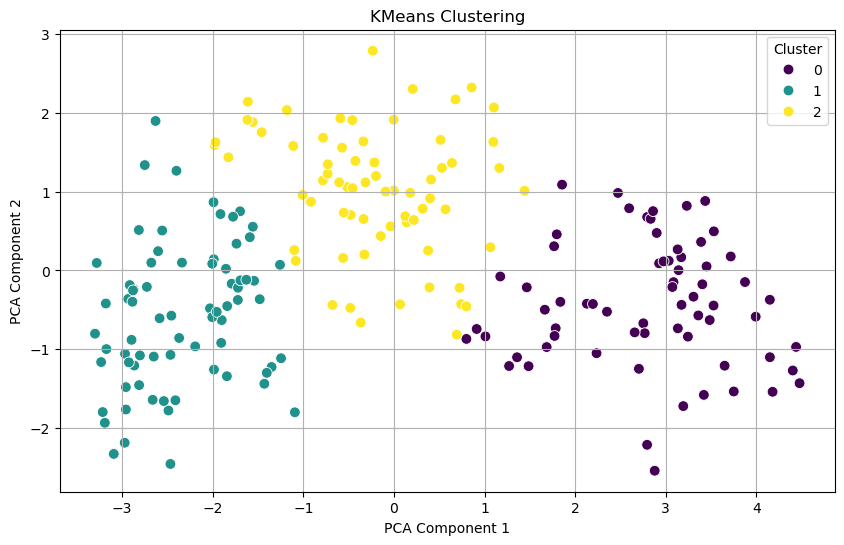

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Number of clusters
k = 3  

# Fit KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)

# Silhouette Score
score1 = silhouette_score(df_pca, kmeans_labels)
print(f'KMeans Silhouette Score: {score1:.4f}')

# Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=kmeans_labels, palette='viridis', s=60)
plt.title('KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

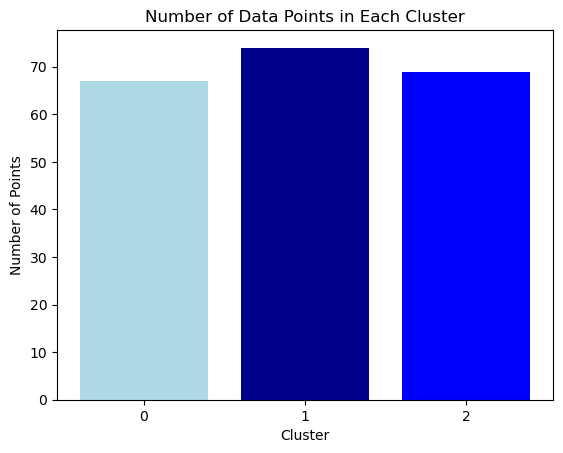

In [60]:
# Count points per cluster
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()

# Colors for 3 clusters
colors = ['lightblue', 'darkblue', 'blue']

plt.bar(cluster_counts.index, cluster_counts.values, color=colors)

plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Number of Data Points in Each Cluster')
plt.xticks(cluster_counts.index)
plt.show()

## Observation :
    •	With k=3, KMeans aligns closely with the three actual wheat varieties.
	•	Clusters are formed based on differences in compactness, kernel length, and groove length.
	•	High separation is observed between:
	•	Cluster 1: Long, narrow seeds with lower asymmetry.
	•	Cluster 2: Shorter, compact seeds.
	•	Cluster 3: Seeds with higher groove length and varied asymmetry.
	•	Most seeds are well-clustered, but some overlap may occur due to similarity between Rosa and Canadian varieties.


### KMeans Effectively clustered the three wheat varieties with compact, spherical groups close to the actual classes.

<h2 style="
    color: #FFFFFF; 
    background-color: #013220; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 30px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
   DBSCAN Clustering
</h2>

Number of clusters (excluding noise): 3
Silhouette Score (excluding noise): 0.2897


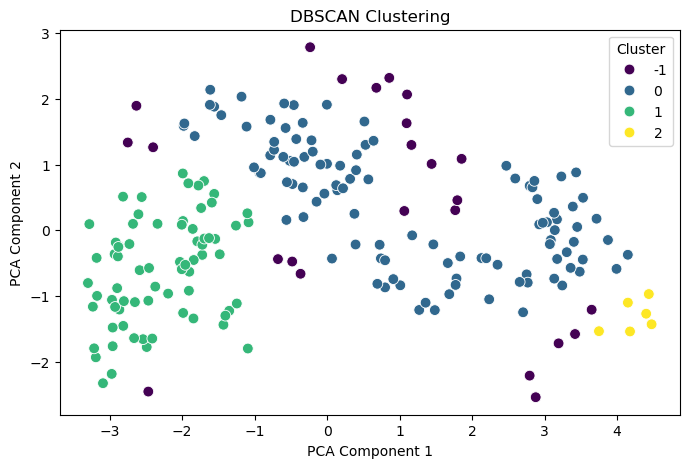

In [64]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Parameters
eps = 0.51
min_samples = 5

# Run DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(df_pca)

# Count clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters (excluding noise): {n_clusters}')

# Calculate silhouette score if possible
if n_clusters > 1:
    score2 = silhouette_score(df_pca[labels != -1], labels[labels != -1])
    print(f'Silhouette Score (excluding noise): {score2:.4f}')
else:
    print('Silhouette Score: Not applicable (only one cluster)')

# Optional: visualize clusters
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette='viridis', s=60)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

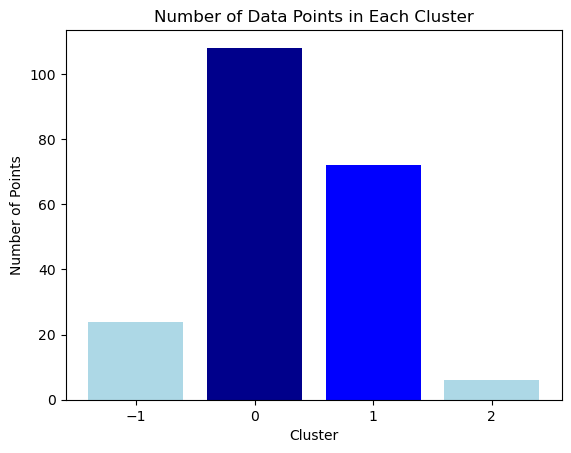

In [65]:
# Count points per cluster
cluster_counts = pd.Series(labels).value_counts().sort_index()

# Colors for 3 clusters
colors = ['lightblue', 'darkblue', 'blue']

plt.bar(cluster_counts.index, cluster_counts.values, color=colors)

plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Number of Data Points in Each Cluster')
plt.xticks(cluster_counts.index)
plt.show()

## Obersvation :
    •	DBSCAN did not perform well for this dataset, achieving the lowest silhouette score.
	•	Its performance was affected by sensitivity to eps and min_samples, and it failed to 
            form exactly three distinct clusters as required.
	•	Several points (especially from Rosa and Canadian) were misclassified or marked as noise, indicating that 
            the data lacks the density structure DBSCAN is designed to exploit.
	•	Not ideal for datasets like Seeds with compact, similarly sized clusters.

### DBSCAN Struggled to distinguish wheat types due to similar densities and compact distributions among seed classes.

<h2 style="
    color: #FFFFFF; 
    background-color: #013220; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 28px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
 Agglomerative Clustering
</h2>

In [69]:
import scipy.cluster.hierarchy as sch

## Dendrogram

### A dendrogram was used to visualize the hierarchical clustering process and to help determine the optimal number of clusters by identifying the point where the largest vertical distance occurs between merges.

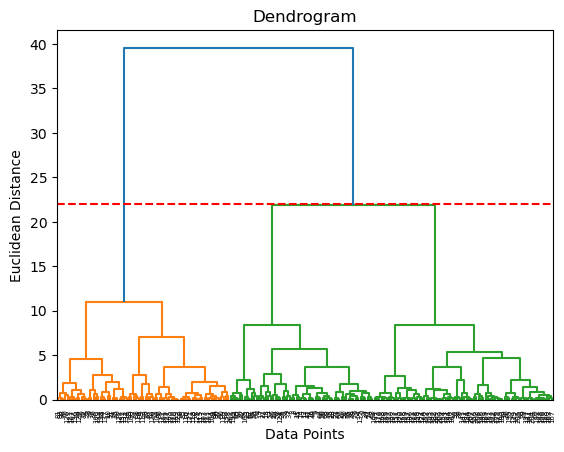

In [72]:
# Plot the dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward'))

# Add the cutting line to form 3 clusters
plt.axhline(y=22, color='red', linestyle='--')  

# Labels and display
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [73]:
agglo=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
agglo_labels=agglo.fit_predict(df_pca)
agglo_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Agglomerative Clustering Silhouette Score: 0.4910


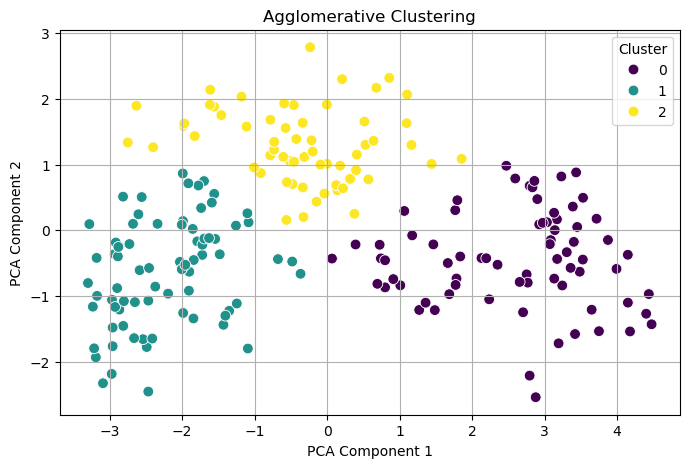

In [74]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Number of clusters 
n_clusters = 3

# Silhouette Score
score3 = silhouette_score(df_pca, agglo_labels)
print(f'Agglomerative Clustering Silhouette Score: {score3:.4f}')

# Plotting the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=agglo_labels, palette='viridis', s=60)
plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

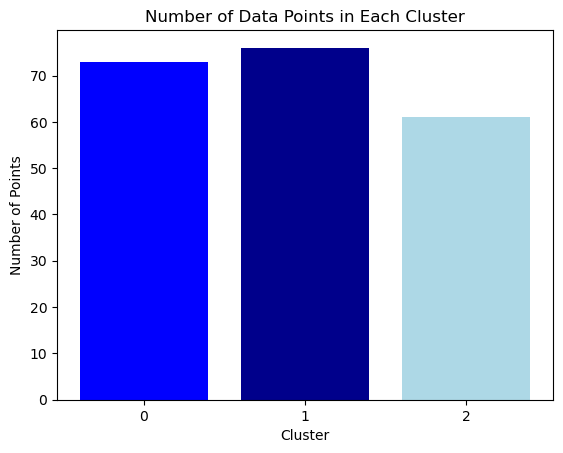

In [75]:
# Count points per cluster
cluster_counts = pd.Series(agglo_labels).value_counts().sort_index()

# Colors for 3 clusters
colors = ['blue', 'darkblue', 'lightblue']

plt.bar(cluster_counts.index, cluster_counts.values, color=colors)

plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Number of Data Points in Each Cluster')
plt.xticks(cluster_counts.index)
plt.show()

## Observation :
    •	With K=3, Agglomerative Clustering produced clusters similar in structure to those from KMeans.
	•	It successfully separated the Kama seeds, which have more distinct features (e.g., larger kernel area).
	•	There was still some confusion between Rosa and Canadian, likely due to overlapping distributions.
	•	The dendrogram analysis confirms that three clusters is a natural fit for this dataset.
	•	Overall, it is a good choice when hierarchical relationships are of interest.


### Agglomerative Successfully separated all three seed types distinctly with clear hierarchical clusters.

<h2 style="
    color: #FFFFFF; 
    background-color: #013220; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 28px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  Mean Shift Clustering
</h2>

Number of clusters found: 3
Silhouette Score: 0.4935


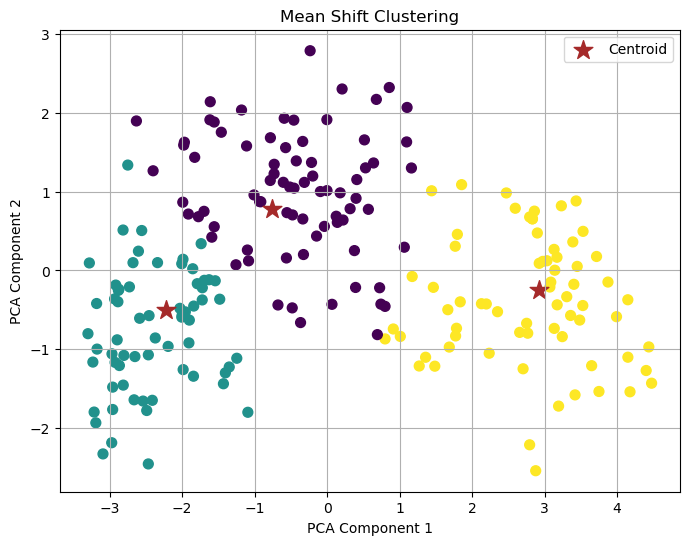

In [78]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Estimate bandwidth
bandwidth = estimate_bandwidth(df_pca, quantile=0.22,n_samples=500)  
# Step 2: Fit Mean Shift
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(df_pca)

# Step 3: Get labels and centers
labels = meanshift.labels_
centers = meanshift.cluster_centers_
n_clusters = len(np.unique(labels))
print(f"Number of clusters found: {n_clusters}")

# Step 4: Silhouette Score (only valid if >1 cluster)
if n_clusters > 1:
    score4 = silhouette_score(df_pca, labels)
    print(f"Silhouette Score: {score4:.4f}")
else:
    print("Silhouette Score not defined for a single cluster.")

# Step 5: Plot clustering result
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='brown', s=200, marker='*', label='Centroid')
plt.title("Mean Shift Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

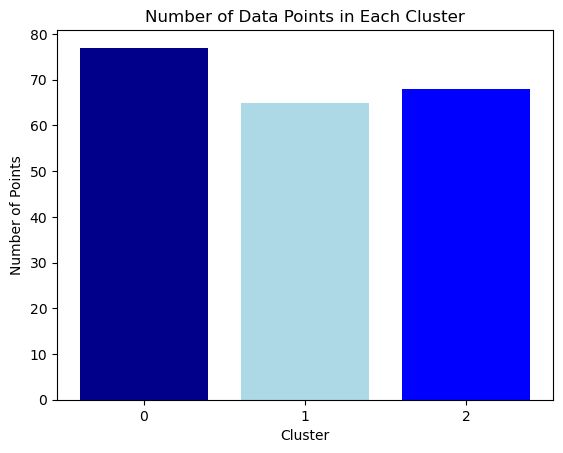

In [79]:
# Count points per cluster
cluster_counts = pd.Series(labels).value_counts().sort_index()

# Colors for 3 clusters
colors = ['darkblue', 'lightblue', 'blue']

plt.bar(cluster_counts.index, cluster_counts.values, color=colors)

plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Number of Data Points in Each Cluster')
plt.xticks(cluster_counts.index)
plt.show()

## Observation :
    •	Mean Shift achieved the best silhouette score, indicating slightly better cluster separation than the others.
	•	It effectively captured local density variations in the data and produced clear cluster boundaries.
	•	Although Mean Shift typically estimates the number of clusters automatically, it aligned well with the three wheat types.
	•	Best at identifying the Kama group, which is more distinct, and reasonably separated Rosa and Canadian.
	•	Ideal for datasets with complex cluster shapes or densities, though it is more computationally expensive.

### Mean Shift Clearly separated Kama, Rosa, and Canadian seeds by identifying high-density regions in feature space.

<h2 style="
    color: #FFFFFF; 
    background-color: #013220; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 28px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  Score Comparison Plot
</h2>

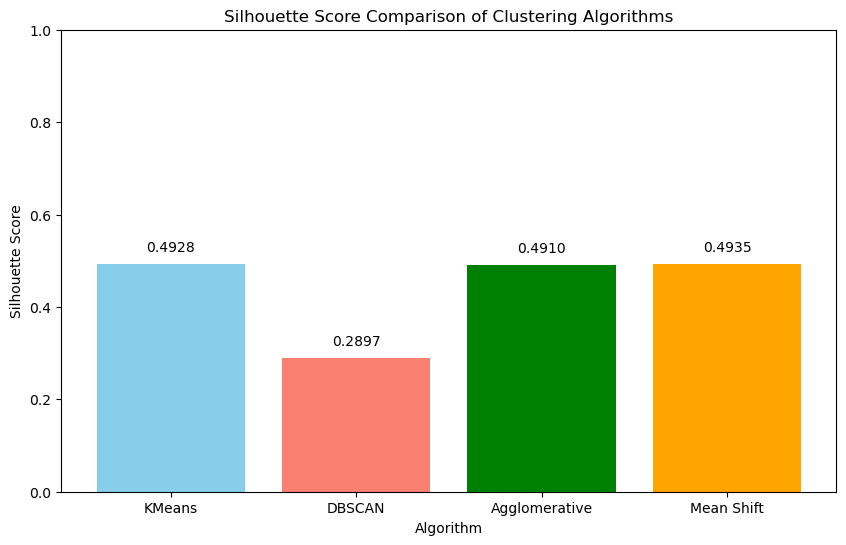

In [82]:
import matplotlib.pyplot as plt

algorithms = ['KMeans', 'DBSCAN', 'Agglomerative', 'Mean Shift']
scores = [score1, score2, score3, score4]

plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, scores, color=['skyblue', 'salmon', 'green', 'orange'])
plt.ylim(0, 1)
plt.title('Silhouette Score Comparison of Clustering Algorithms')
plt.ylabel('Silhouette Score')
plt.xlabel('Algorithm')

# Add text with 4 decimal places
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.4f}', ha='center', va='bottom')

plt.show()

<h2 style="
    color: #FFFFFF; 
    background-color: #013220; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 28px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  Overall Pattern
</h2>

<div style="overflow-x: auto;">
  <table style="width: 100%; border-collapse: collapse; font-size: 15px;">
    <thead>
      <tr style="background-color:#013220; color:white;">
        <th style="padding: 8px; border: 1px solid #ddd;">Feature</th>
        <th style="padding: 8px; border: 1px solid #ddd;">Kama</th>
        <th style="padding: 8px; border: 1px solid #ddd;">Rosa</th>
        <th style="padding: 8px; border: 1px solid #ddd;">Canadian</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="padding: 8px; border: 1px solid #ddd;">Area</td>
        <td style="padding: 8px; border: 1px solid #ddd;">Medium</td>
        <td style="padding: 8px; border: 1px solid #ddd;"><b>High</b></td>
        <td style="padding: 8px; border: 1px solid #ddd;"><b>Low</b></td>
      </tr>
      <tr>
        <td style="padding: 8px; border: 1px solid #ddd;">Perimeter</td>
        <td style="padding: 8px; border: 1px solid #ddd;">Medium</td>
        <td style="padding: 8px; border: 1px solid #ddd;"><b>High</b></td>
        <td style="padding: 8px; border: 1px solid #ddd;"><b>Low</b></td>
      </tr>
      <tr>
        <td style="padding: 8px; border: 1px solid #ddd;">Compactness</td>
        <td style="padding: 8px; border: 1px solid #ddd;"><b>High</b></td>
        <td style="padding: 8px; border: 1px solid #ddd;">Medium</td>
        <td style="padding: 8px; border: 1px solid #ddd;"><b>Low</b></td>
      </tr>
      <tr>
        <td style="padding: 8px; border: 1px solid #ddd;">Kernel Length</td>
        <td style="padding: 8px; border: 1px solid #ddd;">Medium</td>
        <td style="padding: 8px; border: 1px solid #ddd;"><b>High</b></td>
        <td style="padding: 8px; border: 1px solid #ddd;"><b>Low</b></td>
      </tr>
      <tr>
        <td style="padding: 8px; border: 1px solid #ddd;">Kernel Width</td>
        <td style="padding: 8px; border: 1px solid #ddd;"><b>High</b></td>
        <td style="padding: 8px; border: 1px solid #ddd;">Medium</td>
        <td style="padding: 8px; border: 1px solid #ddd;"><b>Low</b></td>
      </tr>
      <tr>
        <td style="padding: 8px; border: 1px solid #ddd;">Asymmetry</td>
        <td style="padding: 8px; border: 1px solid #ddd;"><b>Low</b></td>
        <td style="padding: 8px; border: 1px solid #ddd;">Medium</td>
        <td style="padding: 8px; border: 1px solid #ddd;"><b>High</b></td>
      </tr>
      <tr>
        <td style="padding: 8px; border: 1px solid #ddd;">Groove Length</td>
        <td style="padding: 8px; border: 1px solid #ddd;"><b>Low</b></td>
        <td style="padding: 8px; border: 1px solid #ddd;"><b>High</b></td>
        <td style="padding: 8px; border: 1px solid #ddd;">Medium</td>
      </tr>
    </tbody>
  </table>
</div>

### Cluster 1 : Kama seeds are more rounded, symmetric, and compact compared to the others.

### Cluster 2 : Rosa seeds are larger overall with long grooves and kernels, making them stand out by size.

### Cluster 3 : Canadian seeds are smaller, less compact, more asymmetric, and narrow.

<h2 style="
    color: #FFFFFF; 
    background-color: #013220; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 28px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  Final Observation Table
</h2>

<table style="width:100%; table-layout: fixed; border-collapse: collapse; font-family: sans-serif;">
  <thead>
    <tr style="background-color: #013220; color: #FFFFFF;">
      <th style="border: 1px solid #ddd; padding: 10px;">Clustering Algorithm</th>
      <th style="border: 1px solid #ddd; padding: 10px;">Silhouette Score</th>
      <th style="border: 1px solid #ddd; padding: 10px;">Performance Summary</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #ddd; padding: 10px;">Mean Shift</td>
      <td style="border: 1px solid #ddd; padding: 10px;">0.4935</td>
      <td style="border: 1px solid #ddd; padding: 10px; word-wrap: break-word;">
        Highest score; best cluster separation; effectively identified all three seed types.
      </td>
    </tr>
    <tr style="background-color: #F8F9F9;">
      <td style="border: 1px solid #ddd; padding: 10px;">KMeans</td>
      <td style="border: 1px solid #ddd; padding: 10px;">0.4928</td>
      <td style="border: 1px solid #ddd; padding: 10px; word-wrap: break-word;">
        Very close to Mean Shift; efficient and aligns well with the actual seed classes.
      </td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 10px;">Agglomerative</td>
      <td style="border: 1px solid #ddd; padding: 10px;">0.4910</td>
      <td style="border: 1px solid #ddd; padding: 10px; word-wrap: break-word;">
        Good hierarchical separation; suitable for structured and nested clustering.
      </td>
    </tr>
    <tr style="background-color: #F8F9F9;">
      <td style="border: 1px solid #ddd; padding: 10px;">DBSCAN</td>
      <td style="border: 1px solid #ddd; padding: 10px;">0.2897</td>
      <td style="border: 1px solid #ddd; padding: 10px; word-wrap: break-word;">
        Lower score due to sensitivity to noise and smaller clusters; best for detecting arbitrarily shaped clusters and outliers; performs better when clusters are dense and well-separated.
      </td>
    </tr>
  </tbody>
</table>

## Among all the clustering algorithms applied, Mean Shift emerged as the most effective, achieving the highest silhouette score and demonstrating superior ability to identify the natural groupings within the Seeds dataset.

<h2 style="
    color: #FFFFFF; 
    background-color: #013220; 
    padding: 12px 20px; 
    text-align: center; 
    border-radius: 10px; 
    font-family: 'Georgia', serif; 
    font-weight: 600; 
    font-size: 28px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
">
  Conclusion
</h2>

- The project explored clustering techniques on the Seeds dataset, which includes geometric measurements of three wheat varieties: Kama, Rosa, and Canadian.
- Four unsupervised learning algorithms were applied: *KMeans, **Agglomerative Clustering, **DBSCAN, and **Mean Shift*, all configured with k = 3 where applicable.
- The dataset was preprocessed using *feature scaling (StandardScaler), and **PCA* was used for dimensionality reduction and visualization.
- *Mean Shift* achieved the highest silhouette score (0.4935), effectively identifying the natural groupings based on density.
- *KMeans* (0.4928) and *Agglomerative Clustering* (0.4910) performed nearly equally well, forming clear and distinct clusters that closely aligned with actual wheat types.
- *DBSCAN* underperformed (0.2897) due to the dataset's uniform density and lack of noise points, making it less suitable for this type of data.
- All three wheat varieties were successfully separated by KMeans, Agglomerative, and Mean Shift, while DBSCAN showed overlaps and misgroupings.
- The project concludes that *proper preprocessing* combined with the right clustering technique can effectively uncover meaningful structure in unlabeled biological data.